# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin price analysis: BTC correcting after bullish streak above $49,000.   TL;DR Breakdown Bitcoin price analysis reveals that the king of cryptocurrency is in the correction phase.Strong support is currently found at the $48,083 mark.Strong resistance is currently found at the $49,350 mark. Bitcoin price analysis reveals that the king of cryptocurrency has been going through healthy corrections in the past 24-hours. During the last 24-hours, Bitcoin price is down by 0.17 percent, while it is down by 1.7 percent during the past seven days at the time of writing. Bitcoin is notoriously famous for head and shoulder patterns, and if the current pattern translates into a similar pattern, further correction is on its way. The first few hours of the day are extremely important not just for Bitcoin but overall market trend as well. BTC/USD 1-day candlestick chart shows healthy correction The one-day candlestick Bitcoin price analysis chart reveals that the king is going through a mixed condition where bulls and bears are fighting to take precedent of the market momentum in the hours to come. The upper Bollinger band is still present above the $50,000 barrier at the $50,844 mark amidst decreasing volatility on the one-day chart. The nine-day moving average (SMA 9) is above the current price presenting strong resistance at the $48,659 mark. Whereas the lower Bollinger band and the Bollinger bands&#8217; average are found at the $44,182 and $47,513 marks, presenting strong support to the king of cryptocurrenc... ... [| Skaityti daugiau](https://api.follow.it/track-rss-story-click/v3/tHfgumto13D1LDKFhw1YskGb1Jh49AJn) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- 'No doubt' Americans will need COVID-19 booster shots due to delta variant, says Fauci | CBC News.  The U.S. government's top infectious disease expert says the country is sticking with its recommendation for Americans to get COVID-19 booster shots eight months after receiving the vaccine but will be open to changes based on evolving data. ... [| Skaityti daugiau](http://www.cbc.ca/news/world/coronavirus-covid19-canada-world-august29-2021-1.6157556) 

### Kainų kaita pandemijos metu

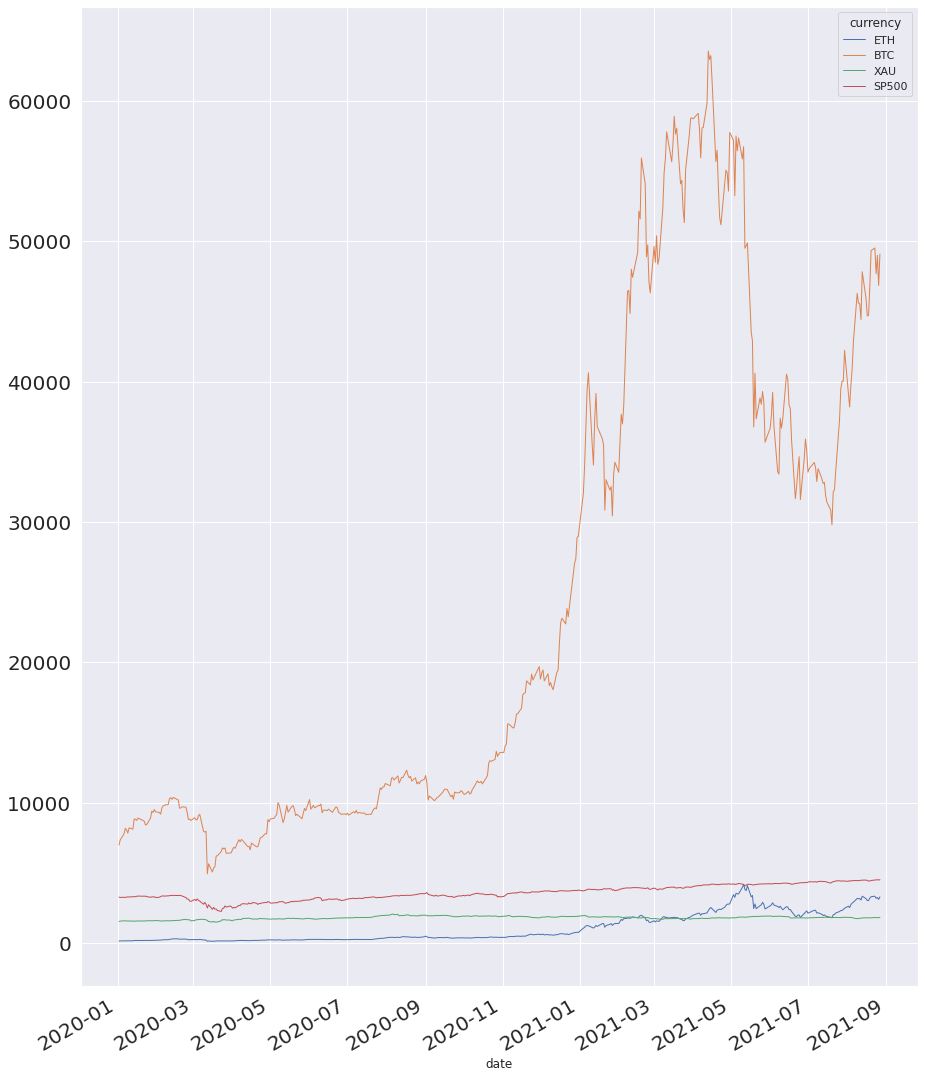

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.888231,0.186816,0.879110
BTC,0.888231,1.000000,0.137192,0.832296
XAU,0.186816,0.137192,1.000000,0.355121
SP500,0.879110,0.832296,0.355121,1.000000


In [8]:
#hide ### Koreliacijos matrica.

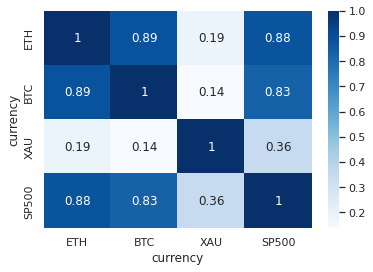

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')